#Project AI
#GOAL :
is to predict the credit card score status based on the applicant’s
information.
##Steps:
1. Data Exploration:
2. Preprocessing:
3. Feature Selection:
4. Data Splitting:
5. Model Training and Selection:
6. Hyperparameter Tuning:
7. Model Evaluation:




### Import necessary libraries

In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations

from sklearn.model_selection import train_test_split  # To split the dataset into training, validation, and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding categorical data and scaling features
from sklearn.neighbors import KNeighborsClassifier  # for the Knn model
from sklearn.tree import DecisionTreeClassifier  # for the Decision Tree model
from sklearn.neural_network import MLPClassifier  # for the Multi-Layer Perceptron model
from sklearn.metrics import accuracy_score  # To evaluate model performance using accuracy
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning using grid search
from geneticalgorithm import geneticalgorithm as ga  # For feature selection using Genetic Algorithms
#for the histogram
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


### Load datasets

In [2]:
application_data = pd.read_csv('application_record.csv')
credit_data = pd.read_csv('credit_record.csv')

### Merge datasets


In [3]:
merged_data = pd.merge(application_data, credit_data, on='ID')
merged_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


### check datatype

In [4]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

### check the null percentage

In [5]:
#We can set a threshold for example if 50% of data is null delete the whole column
(merged_data.isnull().sum()/merged_data.shape[0])*100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.865806
CNT_FAM_MEMBERS         0.000000
MONTHS_BALANCE          0.000000
STATUS                  0.000000
dtype: float64

### count unique values

In [6]:
unique_counts = merged_data.nunique()
print(unique_counts)

ID                     36457
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           10
MONTHS_BALANCE            61
STATUS                     8
dtype: int64


### Map target variable

In [7]:
#0 Approved 0 not approvid 1
status_mapping = {'C': 0, 'X': 0, '0': 1, '1': 1, '2': 1, '3': 1, '4': 1, '5': 1}
merged_data['Status'] = merged_data['STATUS'].map(status_mapping)
merged_data.drop(columns=['STATUS'], inplace=True)# Drop the old 'STATUS' column

### Data Cleaning

In [8]:
merged_data.dropna(inplace=True)
merged_data.drop_duplicates(inplace=True)
merged_data.drop(columns=['ID'], inplace=True)

 ### histogram to understand data distribution

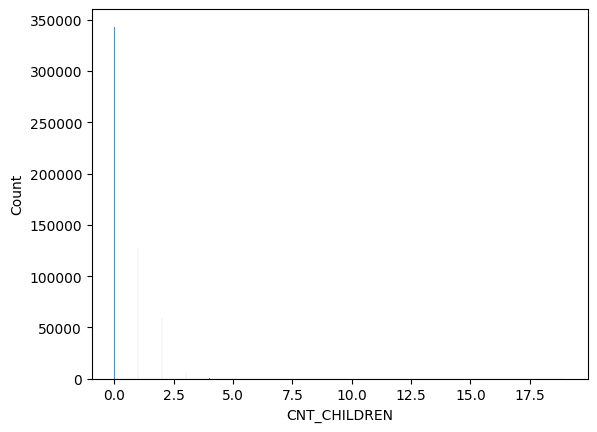

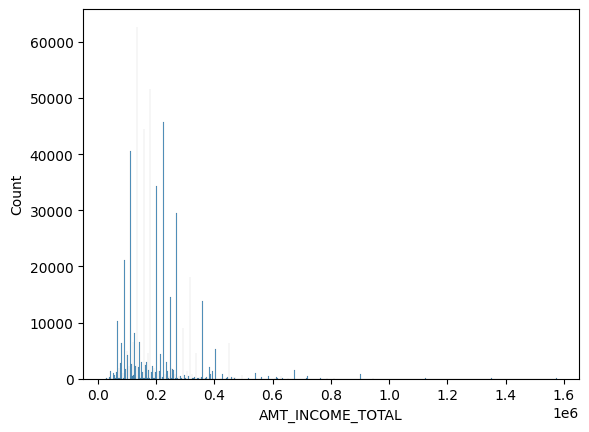

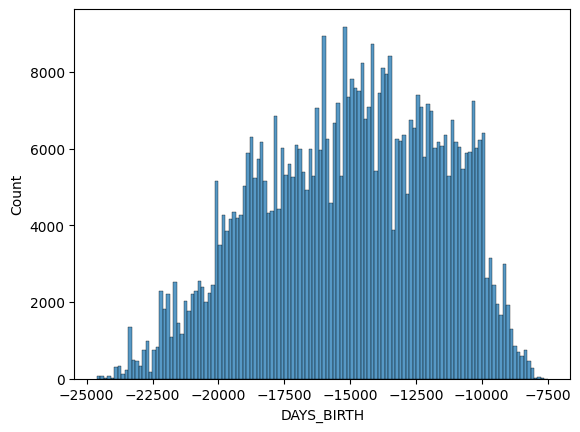

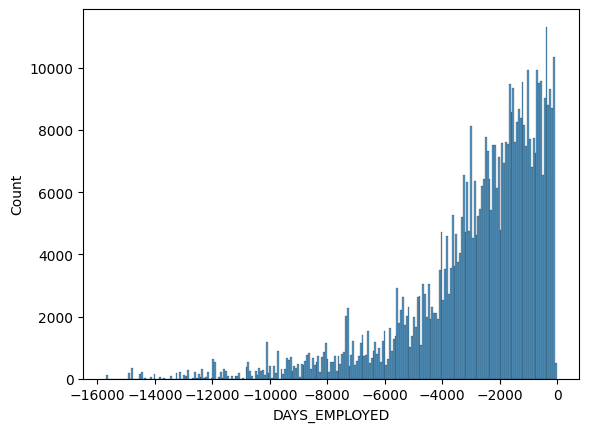

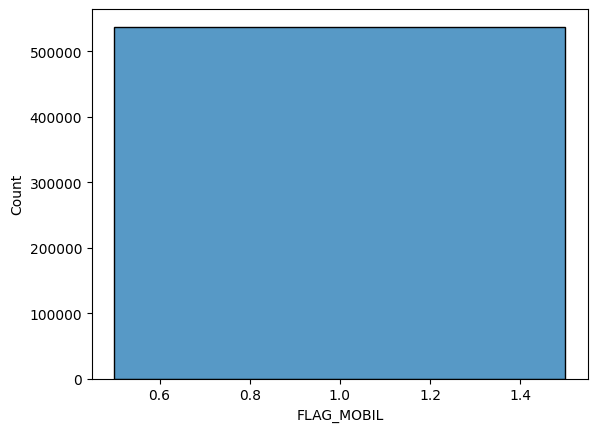

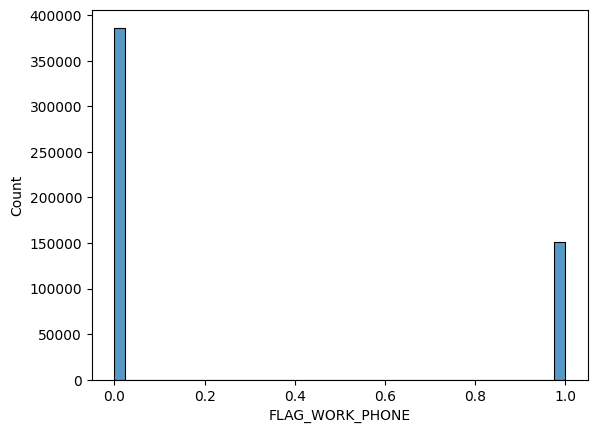

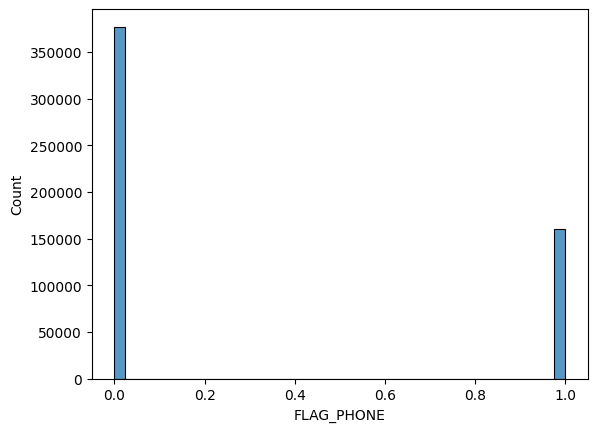

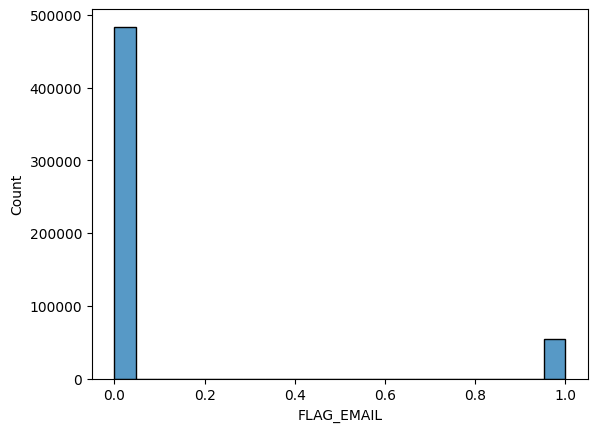

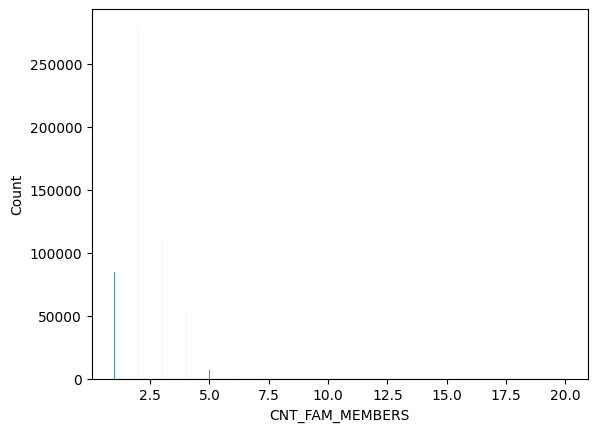

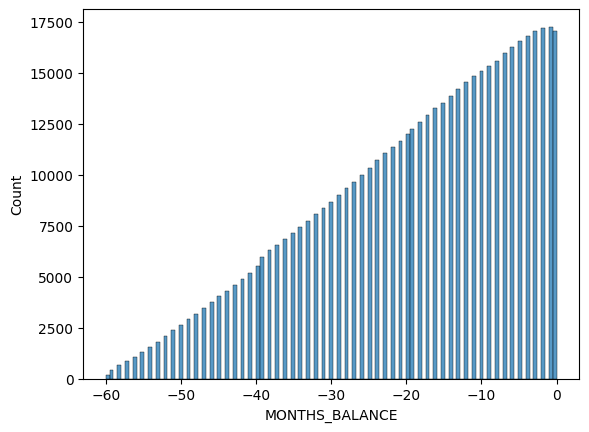

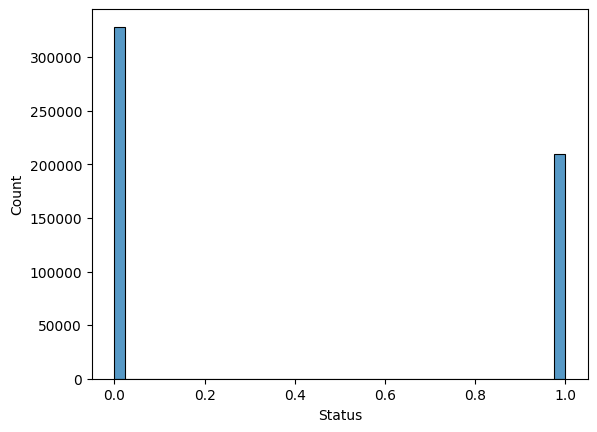

In [9]:
for i in merged_data.select_dtypes(include= "number").columns:
  sns.histplot(data=merged_data,x=i)
  plt.show()

### heatmap

<Axes: >

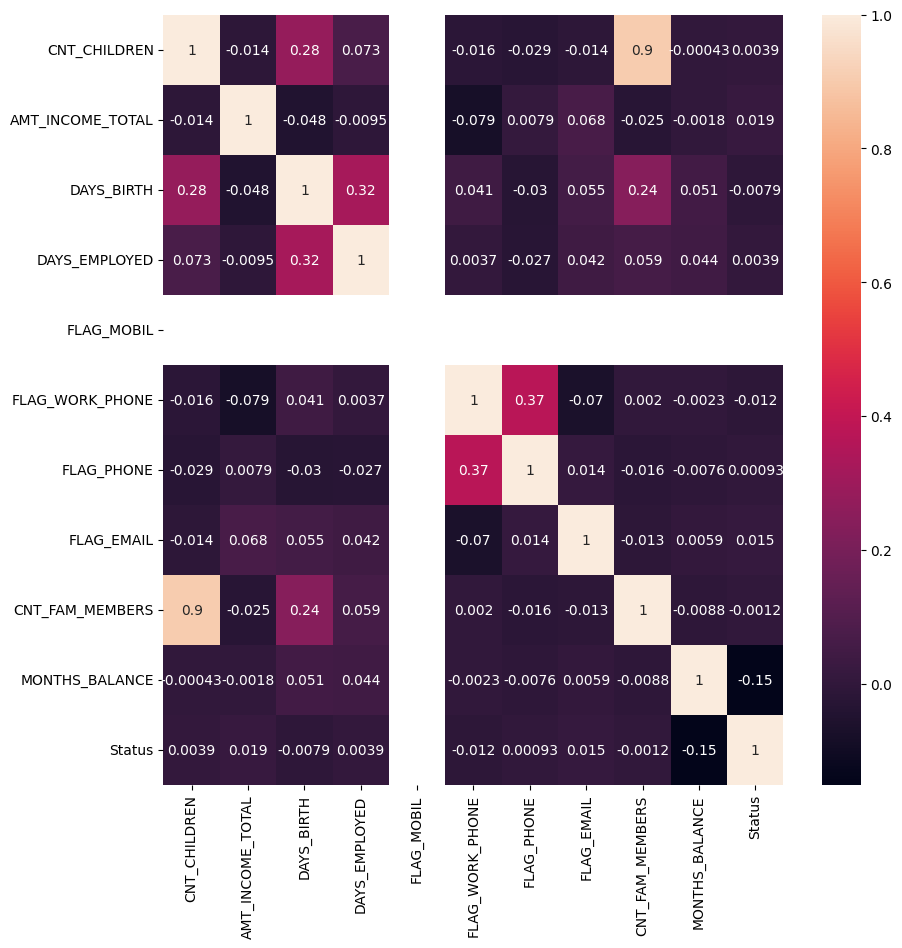

In [10]:
plt.figure(figsize=(10,10))
s = merged_data.select_dtypes(include ="number").corr()
sns.heatmap(s,annot = True)

### Detecting Outliers

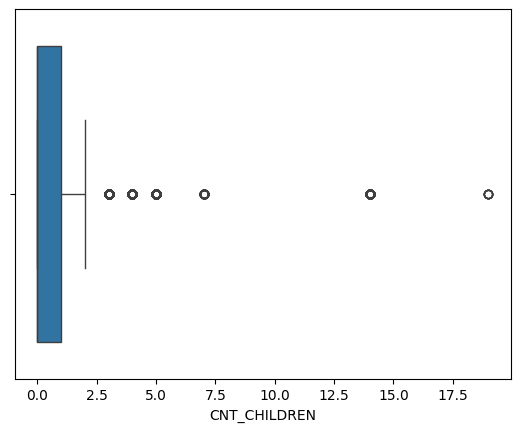

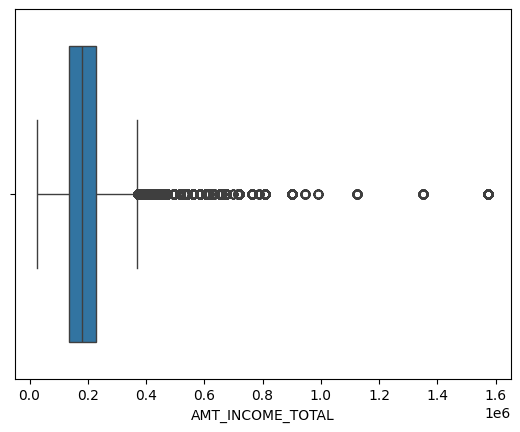

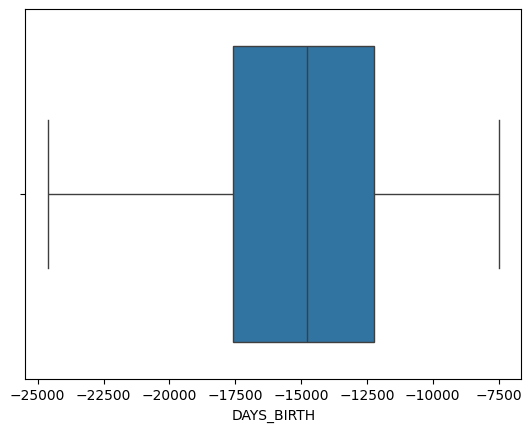

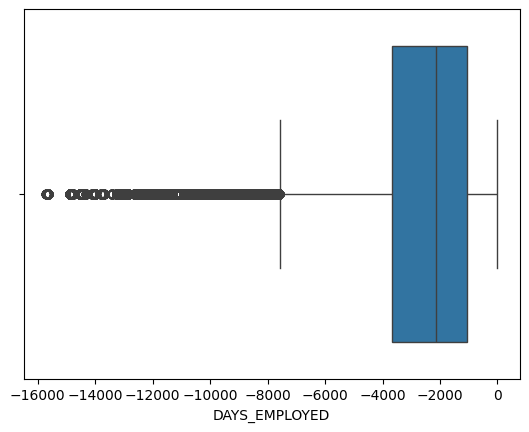

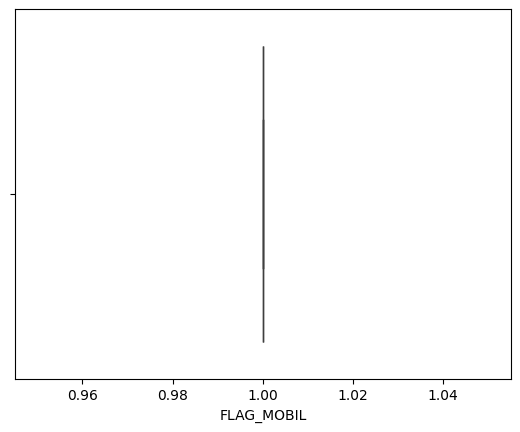

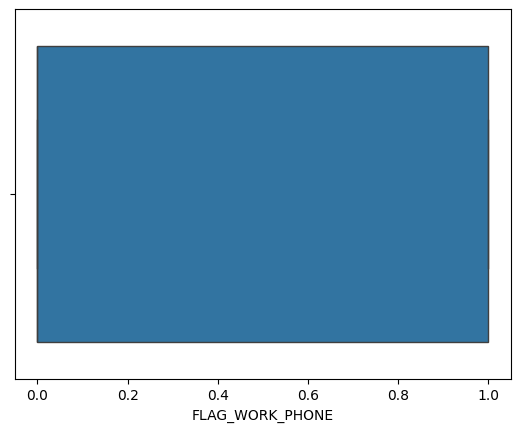

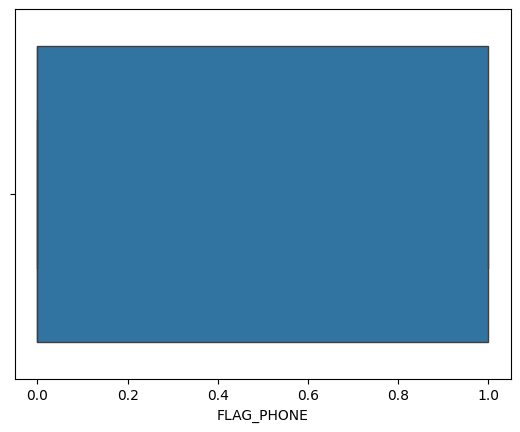

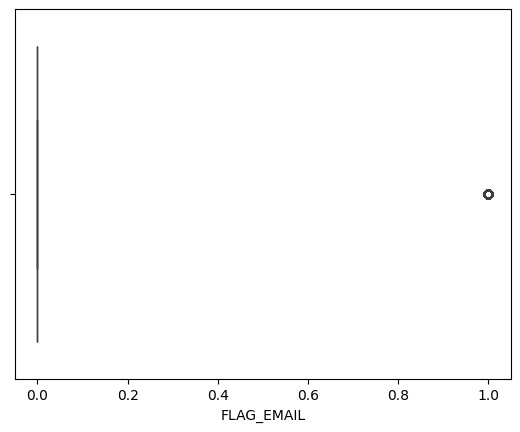

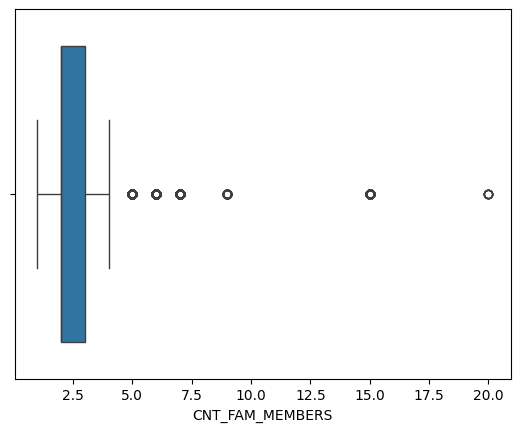

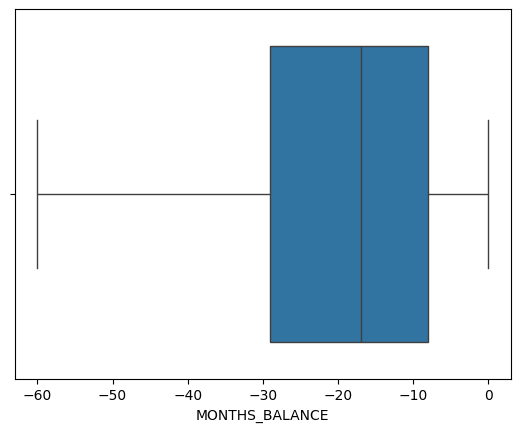

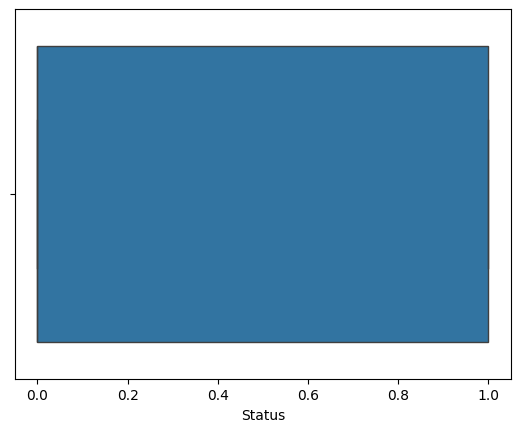

In [11]:
for i in merged_data.select_dtypes(include= "number").columns:
  sns.boxplot(data=merged_data,x=i)
  plt.show()

### Encode categorical variables

In [12]:
categorical_columns = merged_data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    merged_data[col] = le.fit_transform(merged_data[col])

### check datatypes after encoding

In [13]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537667 entries, 31 to 777714
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          537667 non-null  int64  
 1   FLAG_OWN_CAR         537667 non-null  int64  
 2   FLAG_OWN_REALTY      537667 non-null  int64  
 3   CNT_CHILDREN         537667 non-null  int64  
 4   AMT_INCOME_TOTAL     537667 non-null  float64
 5   NAME_INCOME_TYPE     537667 non-null  int64  
 6   NAME_EDUCATION_TYPE  537667 non-null  int64  
 7   NAME_FAMILY_STATUS   537667 non-null  int64  
 8   NAME_HOUSING_TYPE    537667 non-null  int64  
 9   DAYS_BIRTH           537667 non-null  int64  
 10  DAYS_EMPLOYED        537667 non-null  int64  
 11  FLAG_MOBIL           537667 non-null  int64  
 12  FLAG_WORK_PHONE      537667 non-null  int64  
 13  FLAG_PHONE           537667 non-null  int64  
 14  FLAG_EMAIL           537667 non-null  int64  
 15  OCCUPATION_TYPE      

### Feature Scaling

In [14]:
scaler = StandardScaler()#satndard baysa8ar al values bas
scaled_features = scaler.fit_transform(merged_data.drop(columns=['Status'])) #ban exclude al status man al scaling 3ashn dah al target 
X = pd.DataFrame(scaled_features, columns=merged_data.columns[:-1])
y = merged_data['Status']

### check values after scaling

In [15]:
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE
0,1.279748,1.15019,0.745876,-0.643601,-0.812541,0.746758,0.695138,-0.334471,-0.310019,-1.891761,0.680069,0.0,-0.626108,-0.652929,-0.334683,1.955283,-0.323497,1.375231
1,1.279748,1.15019,0.745876,-0.643601,-0.812541,0.746758,0.695138,-0.334471,-0.310019,-1.891761,0.680069,0.0,-0.626108,-0.652929,-0.334683,1.955283,-0.323497,1.303995
2,1.279748,1.15019,0.745876,-0.643601,-0.812541,0.746758,0.695138,-0.334471,-0.310019,-1.891761,0.680069,0.0,-0.626108,-0.652929,-0.334683,1.955283,-0.323497,1.232759
3,1.279748,1.15019,0.745876,-0.643601,-0.812541,0.746758,0.695138,-0.334471,-0.310019,-1.891761,0.680069,0.0,-0.626108,-0.652929,-0.334683,1.955283,-0.323497,1.161523
4,1.279748,1.15019,0.745876,-0.643601,-0.812541,0.746758,0.695138,-0.334471,-0.310019,-1.891761,0.680069,0.0,-0.626108,-0.652929,-0.334683,1.955283,-0.323497,1.090287


## Handling Outliers

In [16]:
# Function to calculate IQR and determine whiskers
def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])  # Calculate Q1 and Q3
    iqr = q3 - q1  # Calculate IQR
    lw = q1 - 1.5 * iqr  # Lower whisker
    uw = q3 + 1.5 * iqr  # Upper whisker
    return lw, uw

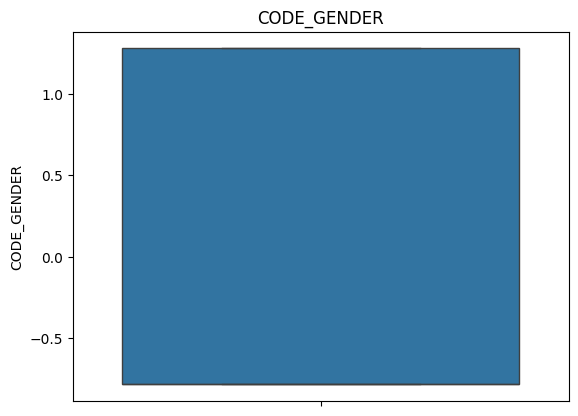

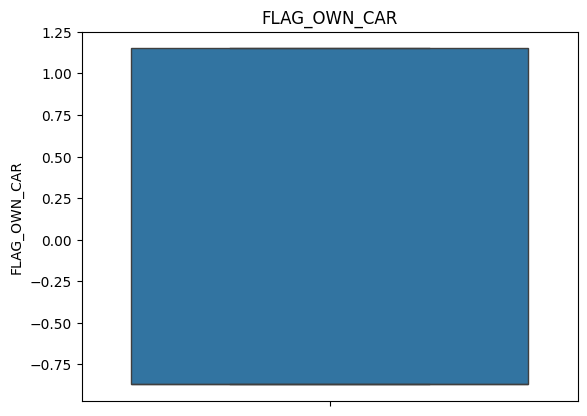

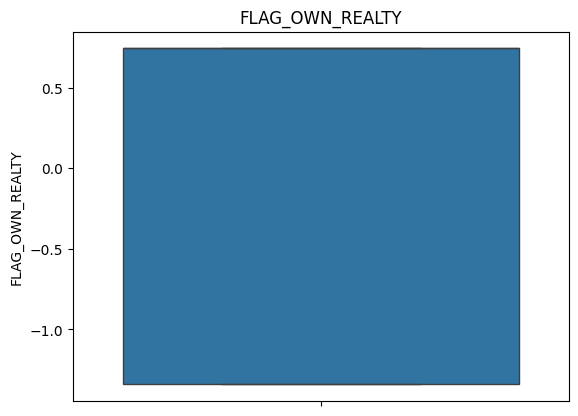

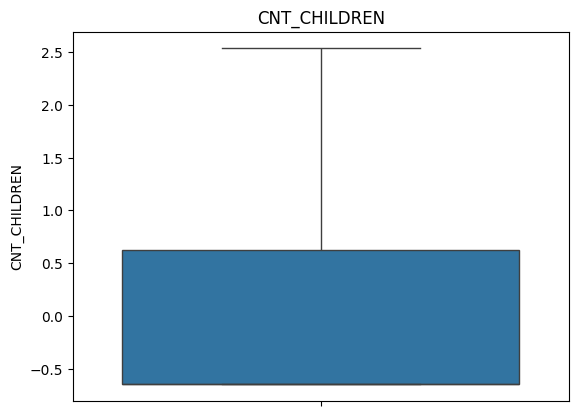

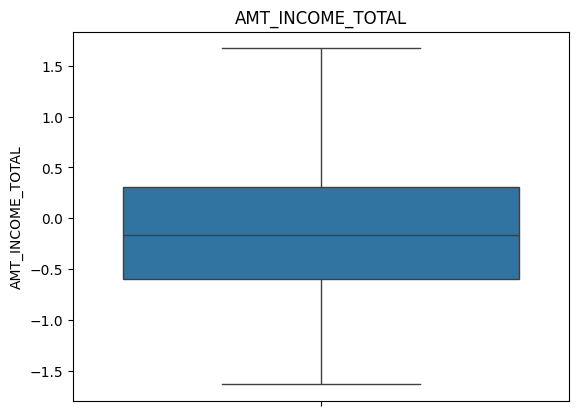

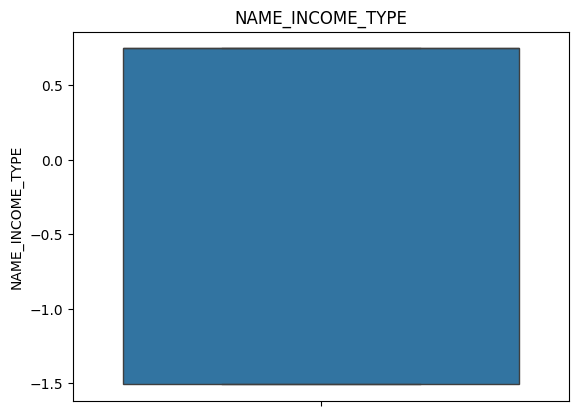

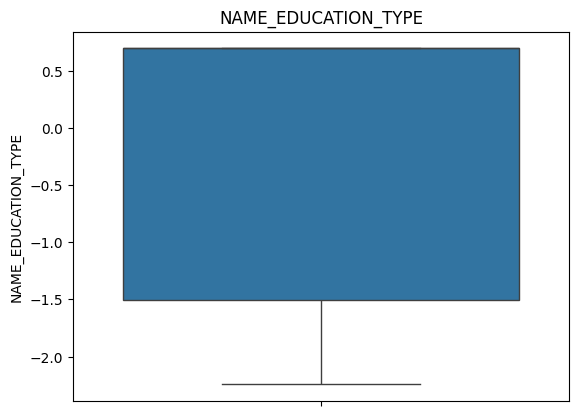

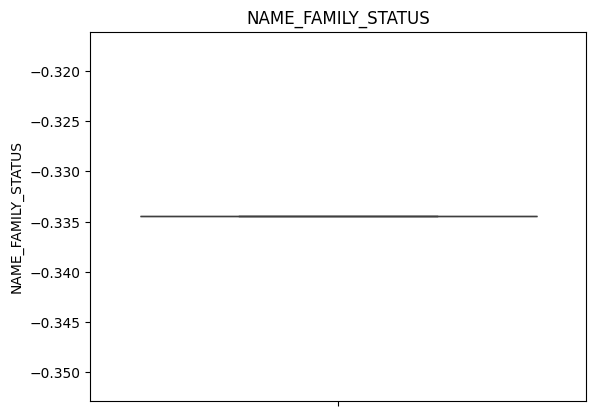

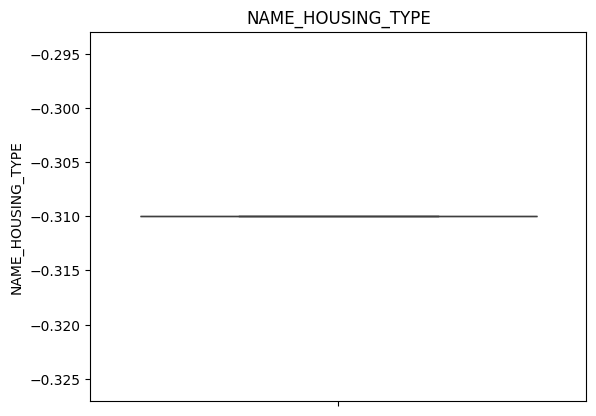

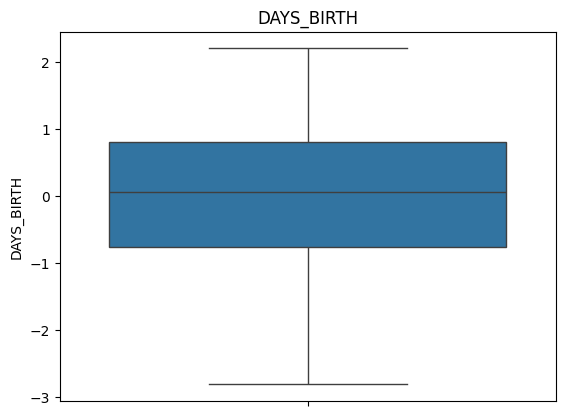

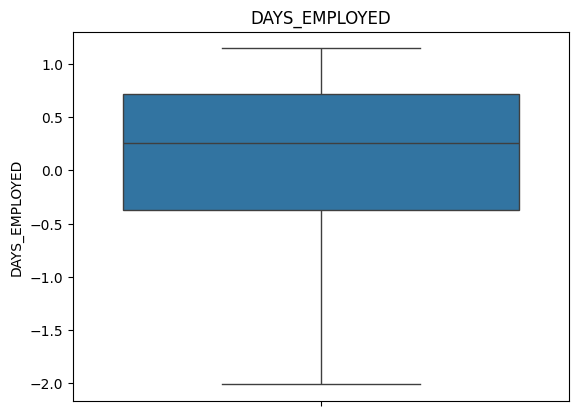

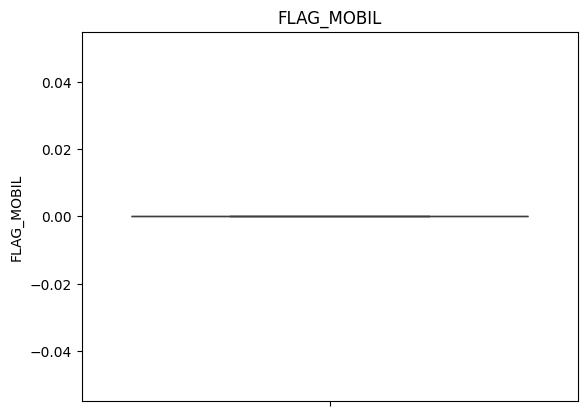

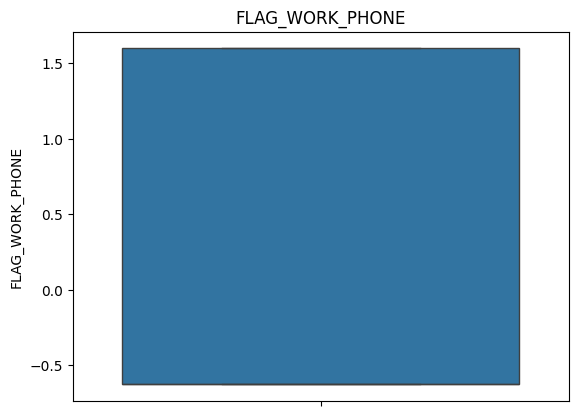

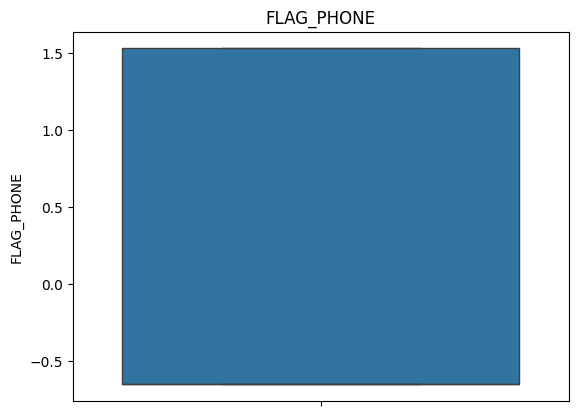

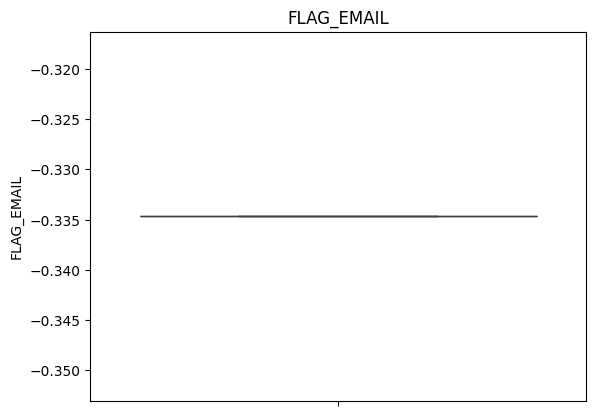

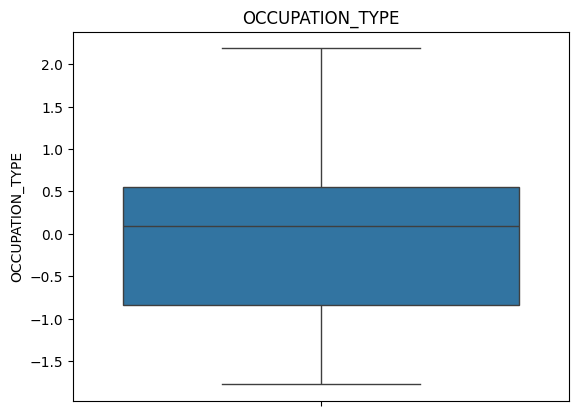

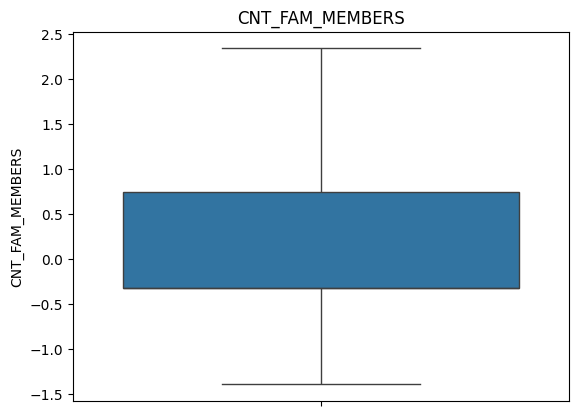

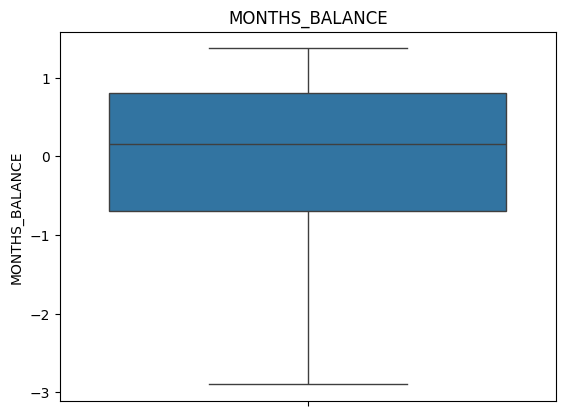

In [17]:
# Handling Outliers
numerical_columns = X.columns  # List of numerical features in your data

for col in numerical_columns:  # Iterate over numerical features
    lw, uw = whisker(X[col])  # Calculate whiskers
    X[col] = np.where(X[col] < lw, lw, X[col])  # Cap lower outliers
    X[col] = np.where(X[col] > uw, uw, X[col])  # Cap upper outliers
    # Assuming 'X' is a DataFrame and 'col' is the column name
    sns.boxplot(data=X, y=col)
    plt.title(f"{col}")
    plt.show()

### Genetic Algorithm for Feature Selection

In [18]:


# Define the fitness function
def fitness_function(selected_features):
    selected_features = np.array(selected_features, dtype=bool)
    if np.sum(selected_features) == 0:
        return 1e6 

    X_selected = X.iloc[:, selected_features]
    X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.15, random_state=42)
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    return 1 - accuracy_score(y_val, predictions)  # Minimize error (maximize accuracy)

# Initialize population
def initialize_population(pop_size, num_features):
    return np.random.randint(0, 2, size=(pop_size, num_features))

# Perform crossover
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1) - 1)  # Avoid ends
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Perform mutation
def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = 1 - individual[i]  # Flip bit
    return individual

# Genetic algorithm
def genetic_algorithm(fitness_fn, num_features, pop_size=50, generations=100, crossover_rate=0.8, mutation_rate=0.1, log_interval=10):
    # Initialize population
    population = initialize_population(pop_size, num_features)
    best_solution = None
    best_fitness = float('inf')

    for generation in range(generations):
        # Calculate fitness for each individual
        fitness_scores = np.array([fitness_fn(ind) for ind in population])

        # Update the best solution
        min_fitness_idx = np.argmin(fitness_scores)
        if fitness_scores[min_fitness_idx] < best_fitness:
            best_fitness = fitness_scores[min_fitness_idx]
            best_solution = population[min_fitness_idx]

        # Select parents (tournament selection)
        parents = []
        for _ in range(pop_size):
            tournament = np.random.choice(pop_size, size=3, replace=False)
            best_idx = tournament[np.argmin(fitness_scores[tournament])]
            parents.append(population[best_idx])
        parents = np.array(parents)

        # Create next generation
        next_generation = []
        for i in range(0, pop_size, 2):
            if np.random.rand() < crossover_rate:
                child1, child2 = crossover(parents[i], parents[i + 1])
            else:
                child1, child2 = parents[i], parents[i + 1]
            next_generation.extend([mutation(child1, mutation_rate), mutation(child2, mutation_rate)])
        
        population = np.array(next_generation)

       
        if (generation + 1) % log_interval == 0 or generation == 0 or generation == generations - 1:
            print(f"Generation {generation + 1}/{generations}, Best Fitness: {best_fitness}")

    return best_solution, best_fitness




best_features, best_fitness = genetic_algorithm(
    fitness_fn=fitness_function,
    num_features=X.shape[1],
    pop_size=50,
    generations=100,
    crossover_rate=0.8,
    mutation_rate=0.1,
    log_interval=10 
)

# Use the selected features
selected_features = np.array(best_features, dtype=bool)
X = X.iloc[:, selected_features]

# Output results
print("Selected features shape:", X.shape)
print("Best fitness (error rate):", best_fitness)


Generation 1/100, Best Fitness: 0.28581170723239635
Generation 10/100, Best Fitness: 0.2857621108231764
Generation 20/100, Best Fitness: 0.2857621108231764
Generation 30/100, Best Fitness: 0.2857621108231764
Generation 40/100, Best Fitness: 0.2857621108231764
Generation 50/100, Best Fitness: 0.2857621108231764
Generation 60/100, Best Fitness: 0.2857621108231764
Generation 70/100, Best Fitness: 0.2857621108231764
Generation 80/100, Best Fitness: 0.2857621108231764
Generation 90/100, Best Fitness: 0.2857621108231764
Generation 100/100, Best Fitness: 0.2857621108231764
Selected features shape: (537667, 11)
Best fitness (error rate): 0.2857621108231764


### Select features based on GA results

In [19]:
selected_features = np.array(best_features, dtype=bool)

# Adjust the length if necessary (ensure boolean mask matches `X.columns`)
if len(selected_features) != len(X.columns):
    selected_features = selected_features[:len(X.columns)]

selected_feature_names = X.columns[selected_features]
X_selected_features = X[selected_feature_names]


### Split

In [20]:
# Split the dataset into Train (70%), Validation (15%), and Test (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)  # 0.1765 ≈ 15/85

# Check the sizes of each split
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Validation set size: {X_val.shape}, {y_val.shape}")
print(f"Testing set size: {X_test.shape}, {y_test.shape}")

Training set size: (376352, 11), (376352,)
Validation set size: (80664, 11), (80664,)
Testing set size: (80651, 11), (80651,)


### training

In [21]:
# K-Nearest Neighbors (KNN)
print("Training KNN...")
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nKNN Classification Report:\n")
print(classification_report(y_test, y_pred_knn))
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}\n")

# Decision Tree
print("Training Decision Tree...")
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
print("\nDecision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt))
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}\n")

# Multi-Layer Perceptron (MLP)
print("Training MLP...")
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("\nMLP Classification Report:\n")
print(classification_report(y_test, y_pred_mlp))
print(f"MLP Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}\n")

Training KNN...

KNN Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.85      0.77     49086
           1       0.65      0.43      0.52     31565

    accuracy                           0.69     80651
   macro avg       0.68      0.64      0.64     80651
weighted avg       0.68      0.69      0.67     80651

KNN Accuracy: 0.6881

Training Decision Tree...

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.86      0.79     49086
           1       0.69      0.49      0.57     31565

    accuracy                           0.71     80651
   macro avg       0.71      0.67      0.68     80651
weighted avg       0.71      0.71      0.70     80651

Decision Tree Accuracy: 0.7140

Training MLP...

MLP Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.89      0.75     49086
           1       0.60     

### Hyperparameter tuning

In [22]:


# Improved RandomizedSearchCV setup
print("Starting Enhanced RandomizedSearchCV for Random Forest...")
rf = RandomForestClassifier(random_state=42)

# Parameter distribution for randomized search
param_dist = {
    'n_estimators': randint(150, 300),  # Increased range for trees
    'max_depth': [10, 20, 30, 40, 50],  # Restrict to likely optimal depths
    'min_samples_split': randint(2, 10),  # Smaller range for splits
    'min_samples_leaf': randint(1, 5),  # Smaller range for leaves
    'bootstrap': [True, False],  # Include bootstrap option
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

# Randomized search with increased iterations and verbose output
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,  # Increased iterations
    cv=5,  # 5-fold cross-validation
    random_state=42,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Extract best parameters, cross-validation score, and test predictions
best_params = random_search.best_params_
best_score = random_search.best_score_
best_model = random_search.best_estimator_

# Evaluate on test set
y_pred_rf = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_rf)

# Output results
print("\n================= Random Forest Tuning Results =================")
print(f"Best Parameters: {best_params}")
print(f"Cross-Validation Best Score: {best_score:.4f}")
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("=================================================================")


Starting Enhanced RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

================= Random Forest Tuning Results =================
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 201}
Cross-Validation Best Score: 0.7135

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.72      0.86      0.79     49086
           1       0.69      0.49      0.57     31565

    accuracy                           0.71     80651
   macro avg       0.71      0.67      0.68     80651
weighted avg       0.71      0.71      0.70     80651

Random Forest Test Accuracy: 0.7141


### Evaluate Models

In [24]:
from sklearn.metrics import accuracy_score

# Assuming `y_test` is the true labels and `y_pred_knn`, `y_pred_dt`, and `y_pred_mlp` are the predictions
knn_accuracy = accuracy_score(y_test, y_pred_knn)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)

print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"MLP Accuracy: {mlp_accuracy:.4f}")

# Find the best classifier
best_model = max([("KNN", knn_accuracy), 
                  ("Decision Tree", dt_accuracy), 
                  ("MLP", mlp_accuracy)], key=lambda x: x[1])
print(f"The best classifier is {best_model[0]} with an accuracy of {best_model[1]:.4f}.")


KNN Accuracy: 0.6881
Decision Tree Accuracy: 0.7140
MLP Accuracy: 0.6423
The best classifier is Decision Tree with an accuracy of 0.7140.
